In [3]:
import numpy as np
import matplotlib.pyplot as plt

# <span style="color:green"> Numerical Simulation Laboratory (NSL) </span>
## <span style="color:blue">  Simulation 7</span>
### <span style="color:orange">  Exercise 7.02: Autocorrelation functions for the potential energy</span>


The system under study is analyzed in the canonical ensamble. Itscthermodynamics is completely defines by the canoncal function $Z$. The probability of being i a certain canonical state  which depends on a Boltzman weight, which depends on the Boltzmann weight. This weight, for two different configurations, is computed through a Metropolis sampling. This allowes to define the thermodynamical properties of the system and the conputation of the radial distribution function, $g(r)$.

This exercise is based on the same setting of exercise 4, so it is under the influence of a Lennard-Jones potential. In this context, it is possible to introduce the tail correction for the potential energy and the pressure as follows,(in lJ units):
$$
<V> = \frac{8 \cdot \rho \epsilon}{9 \cdot r_{c}^{9}} - \frac{8 \rho \epsilon}{8 r_{c}^{3}}
$$
$$
\frac{<W>}{3 N \epsilon} =  32 \cdot \pi \rho [ \frac{1}{9 \cdot r_{c}^{9}} - \frac{1}{6 r_{c}^{3}}]
$$
In the first part of this exercise I am going to conpute the autocorrelations in the instantaneous potential energy, for the three phases of argon, for simulations of $5\cdot10^{5}$ steps. Thie autocorrelation function gives an idea about how large each block should be to put the correlations in a certain quantity to zero.
The equation for computing the autocorrelations in a certain quantity $z$ is the following:
$$
S_{1}(t) = \frac{1}{t_{max}-t} \cdot \sum_{t_{s}=0}^{t_{max}-t} z(t_s)\cdot (t_s+t)
$$

$$
S_{2}(t) = \frac{1}{t_{max}-t}  \cdot \sum_{t_{s}=0}^{t_{max}-t} z(t_s)
$$

$$
S_{3}(t) = \frac{1}{t_{max}-t}  \cdot \sum_{t_{s}=0}^{t_{max}+t} z(t_s +t)
$$

$$
S_{4}(t) = \frac{1}{t_{max}}  \cdot \sum_{t_{s}=0}^{t_{max}} z(t_s)^{2}
$$

$$
S_{5}(t) = S_{2}(t)^{2}
$$

$$
\chi(t) = \frac{S_{1}(t) - S_{2}(t) \cdot S_{3}(t)}{S_{4}(t)-S_{5}(t)}
$$
- $t_s$ time of the simulation
- $t_{max}$ max time of the MC simulation
- $t$ time after which the measure is performed

Then I will write a function that allows to compute the extimation of the tatistical uncertianty as a function of the number of points in each block.


In [20]:
#autocorrelation function computation 
pot_s = np.loadtxt("solidMetro2/out_pot.dat", usecols = 0, unpack = True)



pot_g = np.loadtxt("gasMetro2/out_pot.dat", usecols = 0, unpack = True)

pot_l = np.loadtxt("liquidMetro2/out_pot.dat", usecols = 0, unpack = True)


def autocorr_func(z): # argument= instantaneous quantity
    acf_z=[]
    L = np.arange(0,1000,1)
    tM = len(z)
    for t in L:
        sum_1 = 0
        sum_2 = 0
        sum_3 = 0
        sum_4 = 0
        sum_5 = 0
        for t_sim in range(0,tM - t):
            sum_1 += z[t_sim]* z[t_sim + t]
            sum_2 += z[t_sim]
            sum_3 += z[t_sim + t]
        for t_sim in range(0,tM):
            sum_4 += z[t_sim]**2
            sum_5 += z[t_sim]  
        ac = ((1 / (tM - t)) * sum_1 - (1 / (tM - t)) * sum_2 * (1 / (tM - t)) * sum_3) / ((1 / tM) * sum_4 - ((1 / tM) * sum_5)**2)
        acf_z.append(ac)
    
    return acf_z


acf_pot_s= autocorr_func(pot_s)
acf_pot_g= autocorr_func(pot_g)
acf_pot_l= autocorr_func(pot_l)

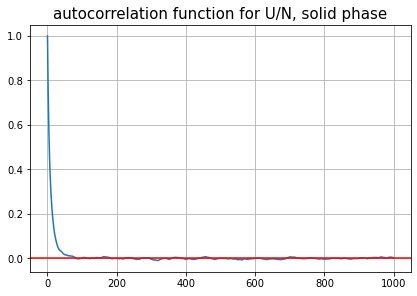

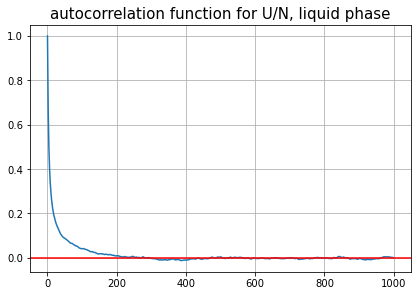

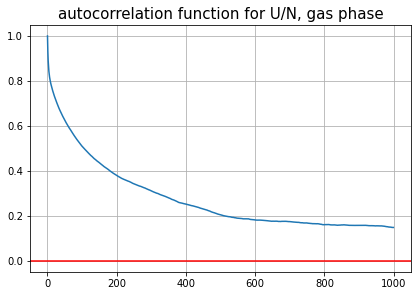

In [21]:
fig = plt.subplots(figsize= (15,10))
plt.subplot(2,2,1)
plt.title('autocorrelation function for U/N, solid phase', fontsize=15)
plt.plot(np.arange(len(acf_pot_s)),acf_pot_s)
plt.axhline(y = 0, color = 'red')
plt.grid('True')
plt.show()

fig = plt.subplots(figsize= (15,10))
plt.subplot(2,2,2)
plt.title('autocorrelation function for U/N, liquid phase', fontsize=15)
plt.plot(np.arange(len(acf_pot_l)),acf_pot_l)
plt.axhline(y = 0, color = 'red')
plt.grid('True')
plt.show()

fig = plt.subplots(figsize= (15,10))
plt.subplot(2,2,2)
plt.title('autocorrelation function for U/N, gas phase', fontsize=15)
plt.plot(np.arange(len(acf_pot_g)),acf_pot_g)
plt.axhline(y = 0, color = 'red')
plt.grid('True')
plt.show()

In [12]:
#function that computes the uncertainty as a function of the dimension of the blocks
# L = size of the blocks
def error(v1,v2,n):  
    if n==0:
        return 0
    else:
        return np.sqrt((v2[n] - v1[n]**2)/n)

def uncertainty(vector):#vector= instantaneous potential energy
    N = np.array([50000, 25000, 10000, 5000, 2500, 1000, 500, 250, 100]) # number of elements in each block
    M = vector.size
    n = 0
    x = np.zeros(len(N))
    uncertainty_cum_sum = np.zeros(len(N))
    unc_progr_err = np.zeros(len(N))
    
    for i in N:  #here implement data-blocking   
        v1 = np.zeros(i)
        v2 = np.zeros(i)
    
        cum_mean = np.zeros(i)
        cum_mean2 = np.zeros(i)
        err_prog = np.zeros(i)
        S = np.zeros(i)
        L = int(M / i)   
        
        for j in range(0,i):
            z = j * L
            for k in range(0,L):
                S[j] += vector[k+z]
            v1[j] = S[j] / L
            v2[j] = (v1[j])**2
        
        for j in range(0,i): #cumulative mean and error
            for k in range(j+1):
                cum_mean[j] += v1[k] 
                cum_mean2[j] += v2[k]
                
            cum_mean[j]/=(j+1) 
            cum_mean2[j]/=(j+1) 
            err_prog[j] = error(cum_mean,cum_mean2,j)
        
        x[n] = L                        
        uncertainty_cum_sum[n] = cum_mean[j]
        unc_progr_err[n] = err_prog[j]
        n = n + 1
        
    return uncertainty_cum_sum , unc_progr_err, x # those are the vector fot the plots
    

unc_s,error_s, x= uncertainty(pot_s)
unc_g, error_g, x= uncertainty(pot_g)
unc_l, error_l, x= uncertainty(pot_l)

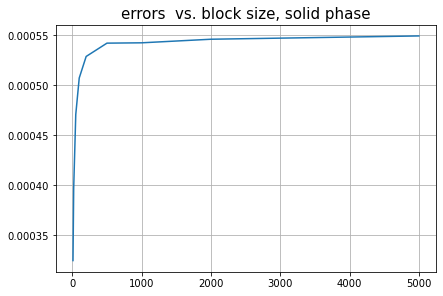

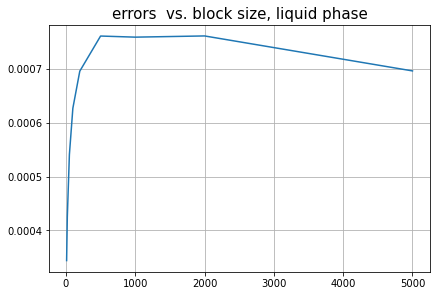

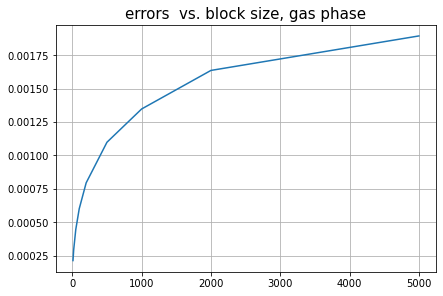

In [17]:
fig = plt.subplots(figsize= (15,10))
plt.subplot(2,2,1)
plt.title('errors  vs. block size, solid phase', fontsize=15)
plt.plot(x,error_s)
plt.grid('True')
plt.show()

plt.subplots(figsize= (15,10))
plt.subplot(2,2,2)
plt.title('errors  vs. block size, liquid phase', fontsize=15)
plt.plot(x,error_l)
plt.grid('True')
plt.show()

plt.subplots(figsize= (15,10))
plt.subplot(2,2,3)
plt.title('errors  vs. block size, gas phase', fontsize=15)
plt.plot(x,error_g)
plt.grid('True')
plt.grid('True')
plt.show()

### <span style="color:orange"> Exercise 7.04: comparison with molecular dynamics  <span>

### SOLID PHASE

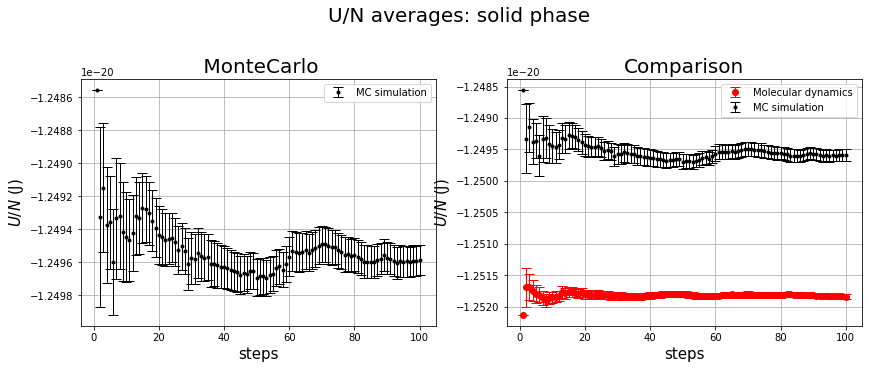

In [4]:
plt.figure(figsize=(14,10))

#constants for conversion
kB = 1.38 * 10**(-23)
eps = 120 * kB
sigma = 0.34 * 10**(-9)
m = 39.948 * 1.66 * 10 **(-27)

#MC
plt.suptitle("U/N averages: solid phase", fontsize = 20)
plt.subplot(2,2,1)
N, epot_mean, std_epot = np.loadtxt("solidMetro2/ave_epot.dat", usecols = (0,2,3), unpack=True)
plt.errorbar(N, epot_mean*eps, yerr=std_epot*eps, fmt = "k.", capsize = 5, elinewidth = 1, label = "MC simulation")
plt.title(" MonteCarlo", fontsize = 20)
plt.grid(True)
plt.xlabel("steps", fontsize = 15)
plt.ylabel("$U/N$ (J)", fontsize = 15)
plt.legend(loc="best")

#MolecularDynamics
plt.subplot(2,2,2)
N, epot_mean_MD, std_epot_MD = np.loadtxt("solidMD2/ave_epot.dat", usecols = (0,2,3), unpack=True)
plt.errorbar(N, epot_mean_MD*eps, yerr=std_epot_MD*eps, fmt = "ro", capsize = 5, elinewidth = 1, label = "Molecular dynamics")
plt.errorbar(N, epot_mean*eps, yerr=std_epot*eps, fmt = "k.", capsize = 5, elinewidth = 1, label = "MC simulation")
plt.grid(True)
plt.title("Comparison", fontsize = 20)
plt.xlabel("N", fontsize = 15)
plt.ylabel("$U/N}$ (J)", fontsize = 15)
plt.grid(True)
plt.xlabel("steps", fontsize = 15)
plt.legend(loc="best")

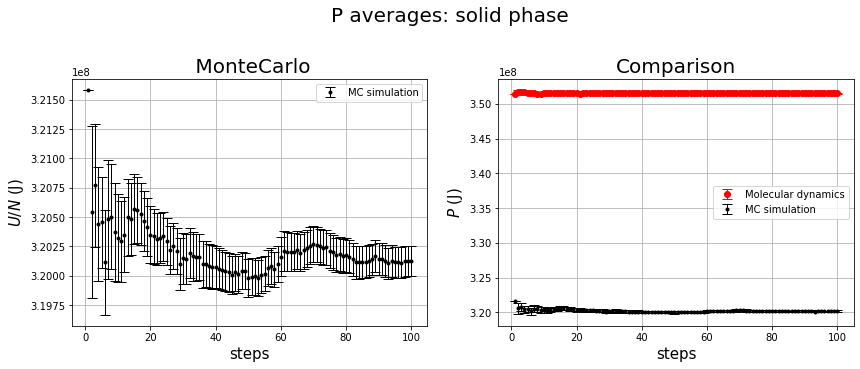

In [5]:
plt.figure(figsize=(14,10))
#MC
plt.suptitle("P averages: solid phase", fontsize = 20)
plt.subplot(2,2,1)
N, p_mean, std_p = np.loadtxt("solidMetro2/ave_pres.dat", usecols = (0,2,3), unpack=True)
plt.errorbar(N, p_mean*(eps/sigma**3), yerr=std_p*(eps/sigma**3), fmt = "k.", capsize = 5, elinewidth = 1, label = "MC simulation")
plt.title(" MonteCarlo", fontsize = 20)
plt.grid(True)
plt.xlabel("steps", fontsize = 15)
plt.ylabel("$U/N$ (J)", fontsize = 15)
plt.legend(loc="best")

#MolecularDynamics
plt.subplot(2,2,2)
N, p_mean_MD, std_p_MD = np.loadtxt("solidMD2/ave_pres.dat", usecols = (0,2,3), unpack=True)
plt.errorbar(N, p_mean_MD*(eps/sigma**3), yerr=std_p_MD*(eps/sigma**3), fmt = "ro", capsize = 5, elinewidth = 1, label = "Molecular dynamics")
plt.errorbar(N, p_mean*(eps/sigma**3), yerr=std_p*(eps/sigma**3), fmt = "k.", capsize = 5, elinewidth = 1, label = "MC simulation")
plt.grid(True)
plt.title("Comparison", fontsize = 20)
plt.xlabel("N", fontsize = 15)
plt.ylabel("$P$ (J)", fontsize = 15)
plt.grid(True)
plt.xlabel("steps", fontsize = 15)
plt.legend(loc="best")

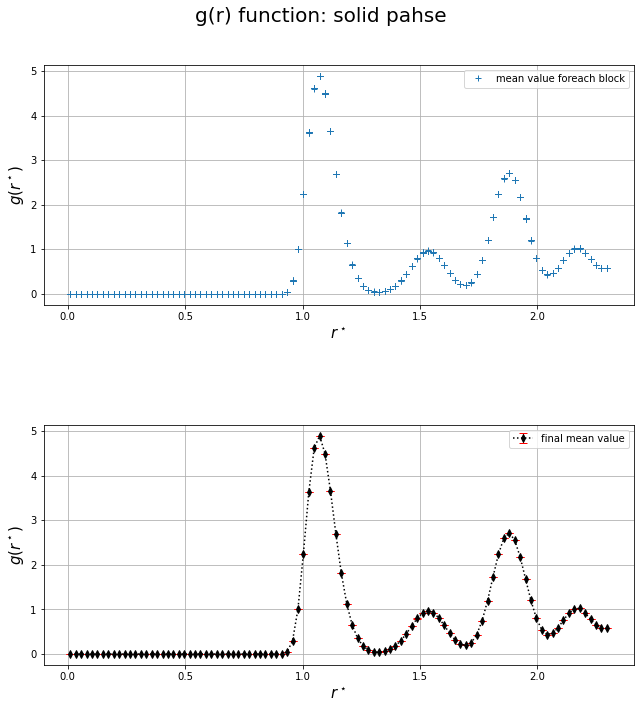

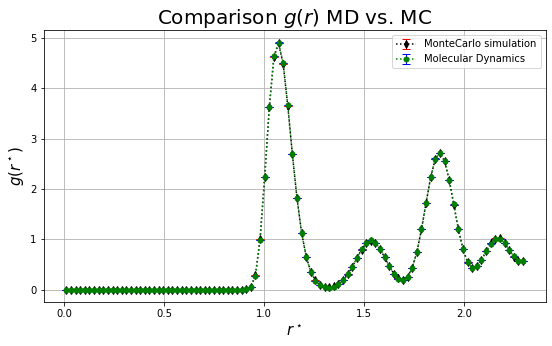

In [7]:
# study of pair correlation function
# r is in LJ units
plt.figure(figsize=(9,10))

plt.subplot(2,1,1)
r, g_r = np.loadtxt('solidMetro2/output_gfunc.dat', usecols = (1, 2), unpack = True)
plt.plot(r,g_r, "+", label = "mean value foreach block")
plt.xlabel("$r^\star$", fontsize = 15)
plt.ylabel("$g(r^\star)$", fontsize = 15)
plt.grid(True)
plt.legend(loc="best")

plt.subplot(2,1,2)
r, g_r,std = np.loadtxt('solidMetro2/output_GAve.dat', usecols = (0, 1, 2), unpack = True)
plt.errorbar(r,g_r, yerr = std, fmt = "dk:", ecolor = "red", elinewidth=1, markersize=5, 
             capsize = 4,label = "final mean value")
plt.xlabel("$r^\star$", fontsize = 15)
plt.ylabel("$g(r^\star)$", fontsize = 15)
plt.legend(loc="best")
plt.grid(True)
plt.suptitle("g(r) function: solid pahse", fontsize = 20)
plt.tight_layout()
plt.subplots_adjust(top=0.9,hspace=0.5)
plt.show()

# comparison with molecular dynamics


plt.figure(figsize=(9,5))
r, g_r,std = np.loadtxt('solidMetro2/output_GAve.dat', usecols = (0, 1, 2), unpack = True)
plt.errorbar(r,g_r, yerr = std, fmt = "dk:", ecolor = "red", elinewidth=1, markersize=5, 
             capsize = 4, label = "MonteCarlo simulation")
rdin, g_rdin,std_din = np.loadtxt('solidMD2/output_Gave.dat', usecols = (0, 1, 2), unpack = True)
plt.errorbar(rdin,g_rdin, yerr = std_din, fmt = "og:", ecolor = "blue", elinewidth=1, markersize=5, 
             capsize = 4, label = "Molecular Dynamics")
plt.xlabel("$r^\star$", fontsize = 15)
plt.ylabel("$g(r^\star)$", fontsize = 15)
plt.legend(loc = "best")
plt.title("Comparison $g(r)$ MD vs. MC", fontsize = 20)
plt.grid('True')
plt.show()


### LIQUID PHASE

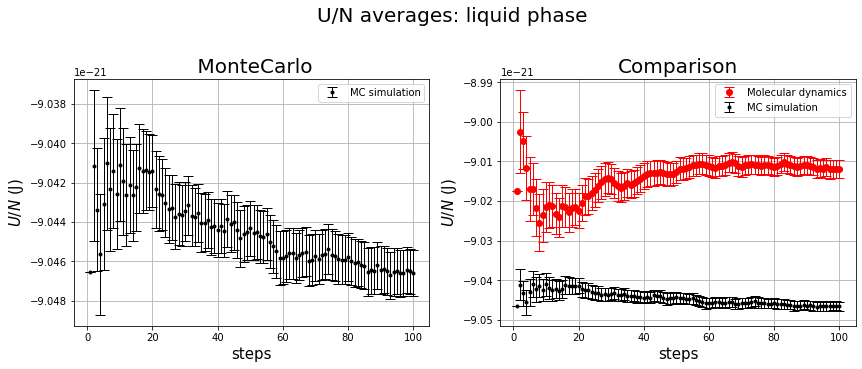

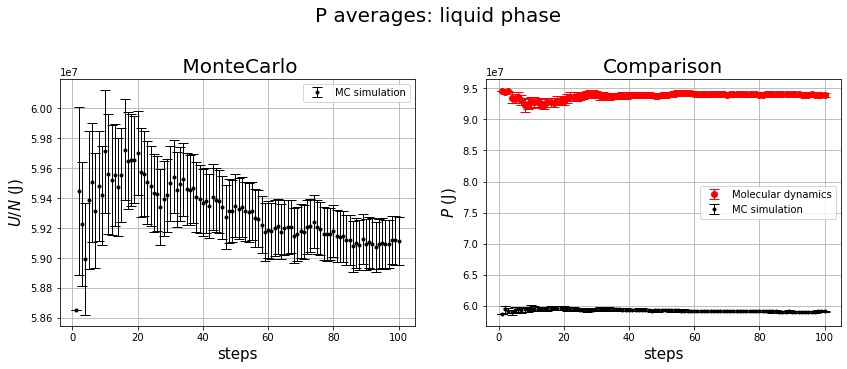

In [8]:
plt.figure(figsize=(14,10))
# LIQUID
#constants for conversion
kB = 1.38 * 10**(-23)
eps = 120 * kB
sigma = 0.34 * 10**(-9)
m = 39.948 * 1.66 * 10 **(-27)

#MC
plt.suptitle("U/N averages: liquid phase", fontsize = 20)
plt.subplot(2,2,1)
N, epot_mean, std_epot = np.loadtxt("liquidMetro2/ave_epot.dat", usecols = (0,2,3), unpack=True)
plt.errorbar(N, epot_mean*eps, yerr=std_epot*eps, fmt = "k.", capsize = 5, elinewidth = 1, label = "MC simulation")
plt.title(" MonteCarlo", fontsize = 20)
plt.grid(True)
plt.xlabel("steps", fontsize = 15)
plt.ylabel("$U/N$ (J)", fontsize = 15)
plt.legend(loc="best")

#MolecularDynamics
plt.subplot(2,2,2)
N, epot_mean_MD, std_epot_MD = np.loadtxt("liquidMD2/ave_epot.dat", usecols = (0,2,3), unpack=True)
plt.errorbar(N, epot_mean_MD*eps, yerr=std_epot_MD*eps, fmt = "ro", capsize = 5, elinewidth = 1, label = "Molecular dynamics")
plt.errorbar(N, epot_mean*eps, yerr=std_epot*eps, fmt = "k.", capsize = 5, elinewidth = 1, label = "MC simulation")
plt.grid(True)
plt.title("Comparison", fontsize = 20)
plt.xlabel("N", fontsize = 15)
plt.ylabel("$U/N}$ (J)", fontsize = 15)
plt.grid(True)
plt.xlabel("steps", fontsize = 15)
plt.legend(loc="best")


plt.figure(figsize=(14,10))
#MC
plt.suptitle("P averages: liquid phase", fontsize = 20)
plt.subplot(2,2,1)
N, p_mean, std_p = np.loadtxt("liquidMetro2/ave_pres.dat", usecols = (0,2,3), unpack=True)
plt.errorbar(N, p_mean*(eps/sigma**3), yerr=std_p*(eps/sigma**3), fmt = "k.", capsize = 5, elinewidth = 1, label = "MC simulation")
plt.title(" MonteCarlo", fontsize = 20)
plt.grid(True)
plt.xlabel("steps", fontsize = 15)
plt.ylabel("$U/N$ (J)", fontsize = 15)
plt.legend(loc="best")

#MolecularDynamics
plt.subplot(2,2,2)
N, p_mean_MD, std_p_MD = np.loadtxt("liquidMD2/ave_pres.dat", usecols = (0,2,3), unpack=True)
plt.errorbar(N, p_mean_MD*(eps/sigma**3), yerr=std_p_MD*(eps/sigma**3), fmt = "ro", capsize = 5, elinewidth = 1, label = "Molecular dynamics")
plt.errorbar(N, p_mean*(eps/sigma**3), yerr=std_p*(eps/sigma**3), fmt = "k.", capsize = 5, elinewidth = 1, label = "MC simulation")
plt.grid(True)
plt.title("Comparison", fontsize = 20)
plt.xlabel("N", fontsize = 15)
plt.ylabel("$P$ (J)", fontsize = 15)
plt.grid(True)
plt.xlabel("steps", fontsize = 15)
plt.legend(loc="best")

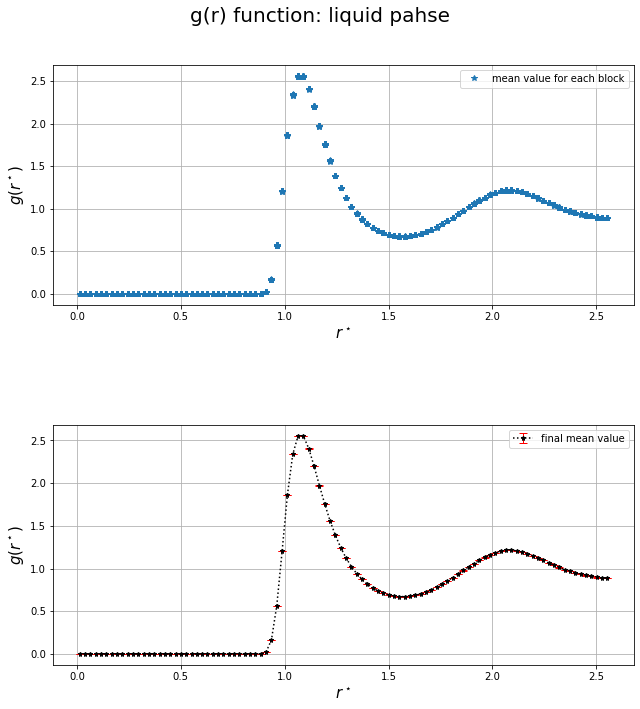

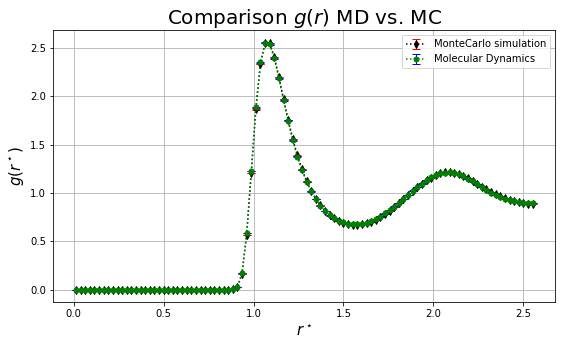

In [9]:
# study of pair correlation function
# r is in LJ units
plt.figure(figsize=(9,10))

plt.subplot(2,1,1)
r, g_r = np.loadtxt('liquidMetro2/output_gfunc.dat', usecols = (1, 2), unpack = True)
plt.plot(r,g_r, "*", label = "mean value for each block")
plt.xlabel("$r^\star$", fontsize = 15)
plt.ylabel("$g(r^\star)$", fontsize = 15)
plt.grid(True)
plt.legend(loc="best")

plt.subplot(2,1,2)
r, g_r,std = np.loadtxt('liquidMetro2/output_GAve.dat', usecols = (0, 1, 2), unpack = True)
plt.errorbar(r,g_r, yerr = std, fmt = "*k:", ecolor = "red", elinewidth=1, markersize=5, 
             capsize = 4,label = "final mean value")
plt.xlabel("$r^\star$", fontsize = 15)
plt.ylabel("$g(r^\star)$", fontsize = 15)
plt.legend(loc="best")
plt.grid(True)
plt.suptitle("g(r) function: liquid pahse", fontsize = 20)
plt.tight_layout()
plt.subplots_adjust(top=0.9,hspace=0.5)
plt.show()

# comparison with molecular dynamics


plt.figure(figsize=(9,5))
r, g_r,std = np.loadtxt('liquidMetro2/output_GAve.dat', usecols = (0, 1, 2), unpack = True)
plt.errorbar(r,g_r, yerr = std, fmt = "dk:", ecolor = "red", elinewidth=1, markersize=5, 
             capsize = 4, label = "MonteCarlo simulation")
rdin, g_rdin,std_din = np.loadtxt('liquidMD2/output_Gave.dat', usecols = (0, 1, 2), unpack = True)
plt.errorbar(rdin,g_rdin, yerr = std_din, fmt = "og:", ecolor = "blue", elinewidth=1, markersize=5, 
             capsize = 4, label = "Molecular Dynamics")
plt.xlabel("$r^\star$", fontsize = 15)
plt.ylabel("$g(r^\star)$", fontsize = 15)
plt.legend(loc = "best")
plt.title("Comparison $g(r)$ MD vs. MC", fontsize = 20)
plt.grid('True')
plt.show()


### GAS PHASE

OSError: gasMD/ave_pres.dat not found.

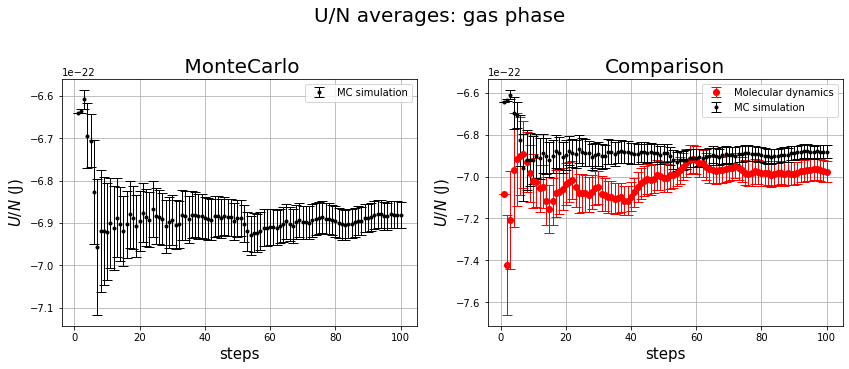

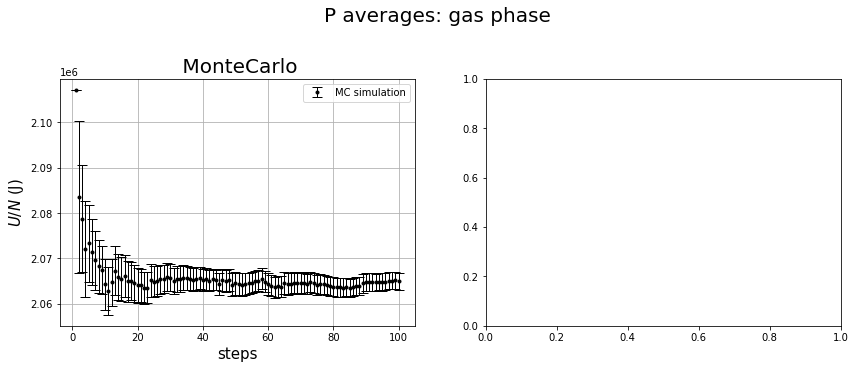

In [10]:
plt.figure(figsize=(14,10))
# GAS
#constants for conversion
kB = 1.38 * 10**(-23)
eps = 120 * kB
sigma = 0.34 * 10**(-9)
m = 39.948 * 1.66 * 10 **(-27)

#MC
plt.suptitle("U/N averages: gas phase", fontsize = 20)
plt.subplot(2,2,1)
N, epot_mean, std_epot = np.loadtxt("gasMetro2/ave_epot.dat", usecols = (0,2,3), unpack=True)
plt.errorbar(N, epot_mean*eps, yerr=std_epot*eps, fmt = "k.", capsize = 5, elinewidth = 1, label = "MC simulation")
plt.title(" MonteCarlo", fontsize = 20)
plt.grid(True)
plt.xlabel("steps", fontsize = 15)
plt.ylabel("$U/N$ (J)", fontsize = 15)
plt.legend(loc="best")

#MolecularDynamics
plt.subplot(2,2,2)
N, epot_mean_MD, std_epot_MD = np.loadtxt("gasMD2/ave_epot.dat", usecols = (0,2,3), unpack=True)
plt.errorbar(N, epot_mean_MD*eps, yerr=std_epot_MD*eps, fmt = "ro", capsize = 5, elinewidth = 1, label = "Molecular dynamics")
plt.errorbar(N, epot_mean*eps, yerr=std_epot*eps, fmt = "k.", capsize = 5, elinewidth = 1, label = "MC simulation")
plt.grid(True)
plt.title("Comparison", fontsize = 20)
plt.xlabel("N", fontsize = 15)
plt.ylabel("$U/N}$ (J)", fontsize = 15)
plt.grid(True)
plt.xlabel("steps", fontsize = 15)
plt.legend(loc="best")


plt.figure(figsize=(14,10))
#MC
plt.suptitle("P averages: gas phase", fontsize = 20)
plt.subplot(2,2,1)
N, p_mean, std_p = np.loadtxt("gasMetro2/ave_pres.dat", usecols = (0,2,3), unpack=True)
plt.errorbar(N, p_mean*(eps/sigma**3), yerr=std_p*(eps/sigma**3), fmt = "k.", capsize = 5, elinewidth = 1, label = "MC simulation")
plt.title(" MonteCarlo", fontsize = 20)
plt.grid(True)
plt.xlabel("steps", fontsize = 15)
plt.ylabel("$U/N$ (J)", fontsize = 15)
plt.legend(loc="best")

#MolecularDynamics
plt.subplot(2,2,2)
N, p_mean_MD, std_p_MD = np.loadtxt("gasMD/ave_pres.dat", usecols = (0,2,3), unpack=True)
plt.errorbar(N, p_mean_MD*(eps/sigma**3), yerr=std_p_MD*(eps/sigma**3), fmt = "ro", capsize = 5, elinewidth = 1, label = "Molecular dynamics")
plt.errorbar(N, p_mean*(eps/sigma**3), yerr=std_p*(eps/sigma**3), fmt = "k.", capsize = 5, elinewidth = 1, label = "MC simulation")
plt.grid(True)
plt.title("Comparison", fontsize = 20)
plt.xlabel("N", fontsize = 15)
plt.ylabel("$P$ (J)", fontsize = 15)
plt.grid(True)
plt.xlabel("steps", fontsize = 15)
plt.legend(loc="best")

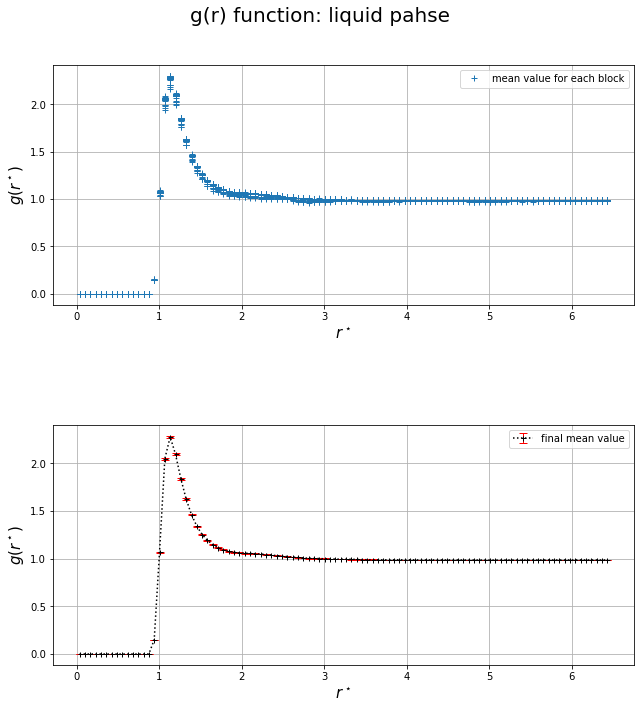

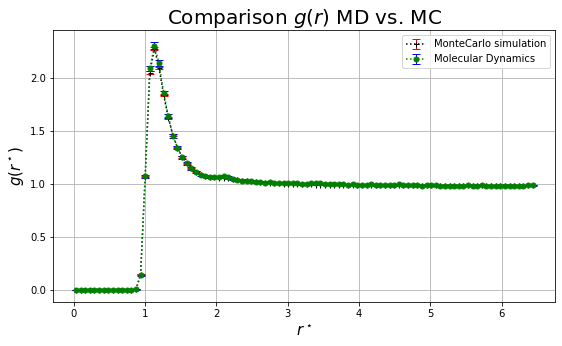

In [7]:
# study of pair correlation function
# r is in LJ units
plt.figure(figsize=(9,10))

plt.subplot(2,1,1)
r, g_r = np.loadtxt('gasMetro/output_gfunc.dat', usecols = (1, 2), unpack = True)
plt.plot(r,g_r, "+", label = "mean value for each block")
plt.xlabel("$r^\star$", fontsize = 15)
plt.ylabel("$g(r^\star)$", fontsize = 15)
plt.grid(True)
plt.legend(loc="best")

plt.subplot(2,1,2)
r, g_r,std = np.loadtxt('gasMetro/output_GAve.dat', usecols = (0, 1, 2), unpack = True)
plt.errorbar(r,g_r, yerr = std, fmt = "+k:", ecolor = "red", elinewidth=1, markersize=5, 
             capsize = 4,label = "final mean value")
plt.xlabel("$r^\star$", fontsize = 15)
plt.ylabel("$g(r^\star)$", fontsize = 15)
plt.legend(loc="best")
plt.grid(True)
plt.suptitle("g(r) function: liquid pahse", fontsize = 20)
plt.tight_layout()
plt.subplots_adjust(top=0.9,hspace=0.5)
plt.show()

# comparison with molecular dynamics


plt.figure(figsize=(9,5))
r, g_r,std = np.loadtxt('gasMetro/output_GAve.dat', usecols = (0, 1, 2), unpack = True)
plt.errorbar(r,g_r, yerr = std, fmt = "+k:", ecolor = "red", elinewidth=1, markersize=5, 
             capsize = 4, label = "MonteCarlo simulation")
rdin, g_rdin,std_din = np.loadtxt('gasMD/output_Gave.dat', usecols = (0, 1, 2), unpack = True)
plt.errorbar(rdin,g_rdin, yerr = std_din, fmt = "og:", ecolor = "blue", elinewidth=1, markersize=5, 
             capsize = 4, label = "Molecular Dynamics")
plt.xlabel("$r^\star$", fontsize = 15)
plt.ylabel("$g(r^\star)$", fontsize = 15)
plt.legend(loc = "best")
plt.title("Comparison $g(r)$ MD vs. MC", fontsize = 20)
plt.grid('True')
plt.show()


Thanks to the anlysis of the uncertanties as a function of the size of the block, we can colclude that the error reaches a sort of plateau value, though for the liquid phase there is some sort of local maxima which is not expected. The simulation, in order to put the correlations to zero have been realized using 100 blocks of 5000 elements. Note that in the gas phase the correlation do not reache zero as in the other two phases, tha's unusual because in the gas phase the correlations should rapidly tend to zero.
The comparison of the results with the molecular dynamics codes suggest that in most cases the values of the quantities of interest computed with the two methods are roughly comparable. The least satisfying results are the one obtained for the pressure, but this could be due to the fact that:
 - the MD simulations may not be perfectly equilibrated;
 - the study of correlations for the MD case has not been extensively developed, so some kind of correlation may persists.


On the other hand the analysis of the $g(r *)$, ($r* = r/\sigma$), function for both cases has produced results that can be considered equivalent. Moreover, the $g(r)$ functions obtained turn out to tend to zero as $r*$ approaches to zero, and to tend to 1, so approaching the ideal gas limit, when $r*$ icreases, that's because of the shape of the 